### TCS Stock Data Analysis and Prediction:

# Import Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

## Load The Dataset:

In [2]:
df = pd.read_csv('TCS_stock_history.csv')

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


# MISSING VALUE PROCESSING:

<Axes: >

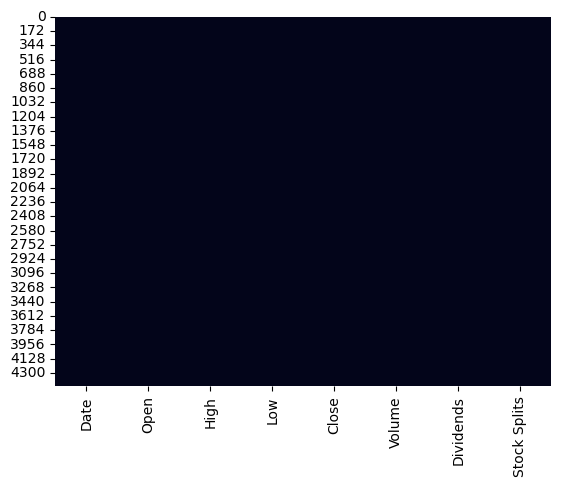

In [6]:
plt.figure(figure=(20,10))
sns.heatmap(df.isnull(),cbar=False)

In [7]:
#Check for null Values:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
# Convert numeric columns if required:

In [9]:
cols_to_convert = ['Open', 'High', 'Low', 'Close']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [10]:
# Fill any remaining NaN values:
df.fillna(method='ffill', inplace=True)

# Plotting Close price over time:

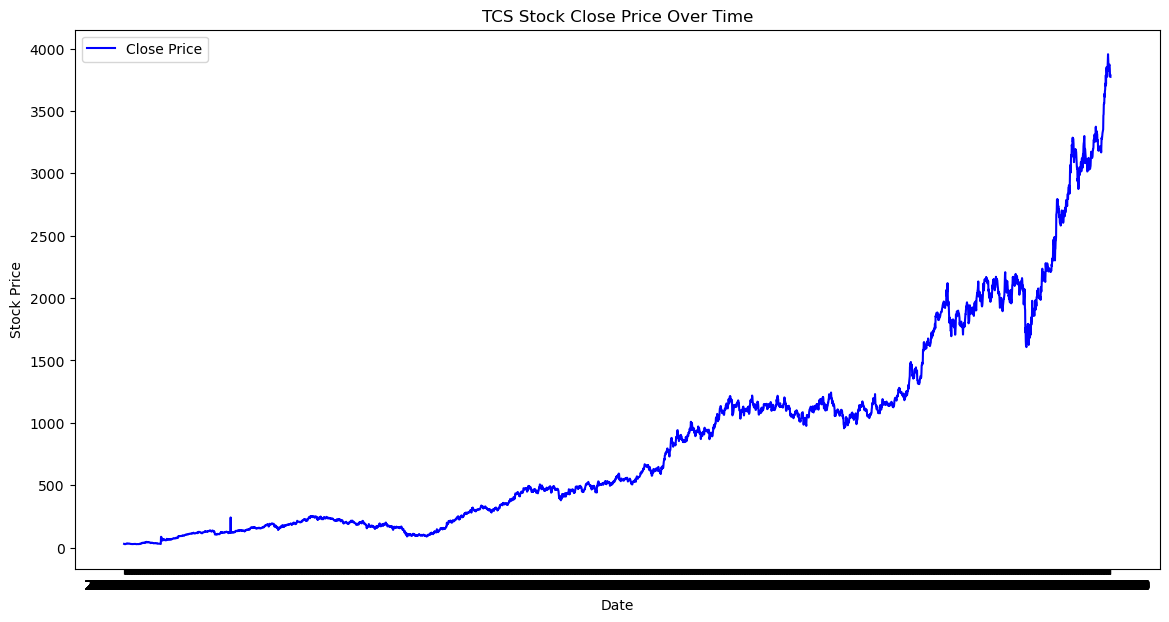

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], color='blue',
label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

# Calculating 50-Day and 200-Day moving averages:

In [12]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot with Moving Averages:

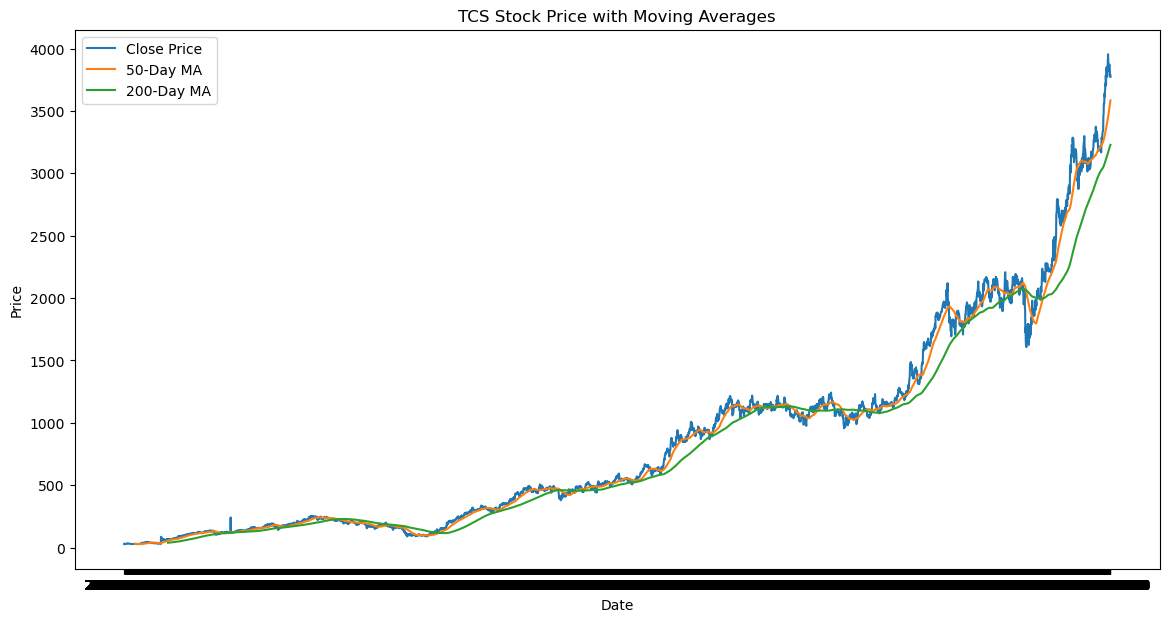

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.plot(df['Date'], df['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

# Feature Engineering:

In [23]:
df['Year'] = df['Date'].dt.year         # Extracts the year (e.g., 2023)
df['Month'] = df['Date'].dt.month       # Extracts the month (1–12)
df['Day'] = df['Date'].dt.day           # Extracts the day of the month (1–31)
df['Day_of_Week'] = df['Date'].dt.dayofweek  # Extracts the day of the week (0=Monday, 6=Sunday)

In [24]:
# Lag Features:
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)

In [25]:
# Feature Selection:
X = df[['Open', 'High', 'Low', 'Volume', 'Prev_Close',
 'Day_of_Week', 'Month']]
y = df['Close']

In [26]:
X.head()

,Open,High,Low,Volume,Prev_Close,Day_of_Week,Month
201,64.596334,65.061056,61.584935,22912,63.927155,2,6
202,63.192893,64.317518,61.919554,21592,62.681683,3,6
203,63.202185,65.061073,63.202185,60280,63.722672,4,6
204,64.838011,67.849412,64.838011,100536,63.722672,0,6
205,67.849399,68.016698,65.525790,47952,66.808434,1,6


In [27]:
y.head()

201    62.681683
202    63.722672
203    63.722672
204    66.808434
205    66.352997
Name: Close, dtype: float64

# Data Splitting:

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
X_train.shape

(3196, 7)

In [30]:
X_test.shape

(1066, 7)

# Feature Scaling:

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
# Fit only to training data
scaler.fit(X)

StandardScaler()

In [34]:
#now apply the transformation to data:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
X_train[:5]

array([[ 1.30881828e+00,  1.34565175e+00,  1.33393191e+00,
        -2.34365396e-01,  1.33760371e+00, -1.41132604e+00,
        -4.48570891e-01],
       [-9.32907894e-01, -9.29031600e-01, -9.29660504e-01,
         1.60468922e-01, -9.30517375e-01, -1.41132604e+00,
         1.30914514e+00],
       [ 4.93312996e-04, -1.07463799e-02, -1.69384231e-02,
        -6.24639079e-01, -2.10462064e-03,  1.42162890e+00,
         1.30914514e+00],
       [ 2.77281191e+00,  2.84922862e+00,  2.81438870e+00,
        -6.34307854e-02,  2.78526143e+00,  1.42162890e+00,
        -1.55618219e-01],
       [-8.57322315e-01, -8.49728138e-01, -8.53279473e-01,
         9.47434418e-01, -8.61435982e-01,  5.15143144e-03,
         1.01619247e+00]])

In [36]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predictions
y_pred = model.predict(X_test)

In [41]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test,
y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 37.42053247081508
R-Squared Score: 0.9999423444459569


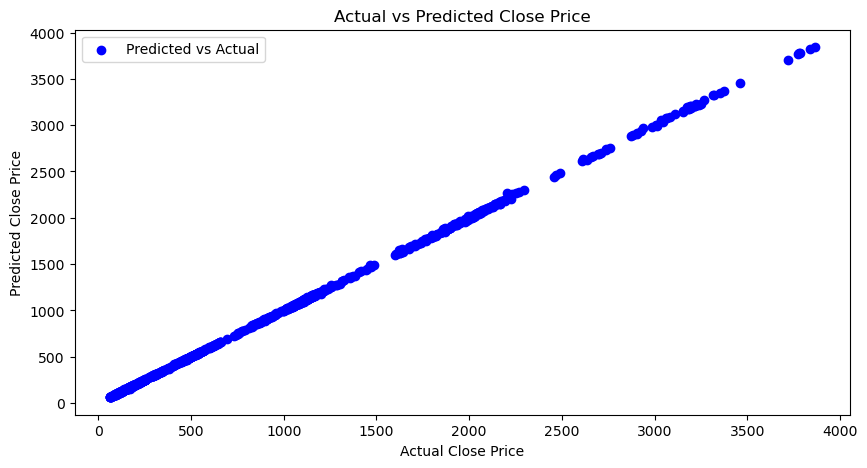

In [39]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()